<a href="https://colab.research.google.com/github/mosesdiaz/Caso-1-Analisis-de-datos/blob/main/Caso_1_An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 1 - Análisis de datos
Prueba realizada por Moises Diaz

Buscamos analizar lo siguiente:


1. Transacciones de montos altos durante las primeras horas de la mañana, es decir,
entre las 6:00 a 8:00 a. m.
2. Algunos estafadores efectúan múltiples transacciones de bajo valor (generalmente
menos de $2,00) utilizando tarjetas de crédito, lo cual suele pasar desapercibido
para los titulares de estas.



### Importamos librerias a utilizar

In [2]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Cargamos los archivos a analizar:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving card_holder.csv to card_holder.csv
Saving credit_card.csv to credit_card.csv
Saving merchant.csv to merchant.csv
Saving merchant_category.csv to merchant_category.csv
Saving transaction.csv to transaction.csv


## 2. Identificación de transacciones sospechosas entre 6 am y 8 am:

Cargamos la data en dataframes

In [4]:
transactions = pd.read_csv("transaction.csv")
credit_cards = pd.read_csv('credit_card.csv')
card_holders = pd.read_csv('card_holder.csv')
merchants = pd.read_csv('merchant.csv')


In [5]:
# debido a que las tarjetas de la tabla credit cards estan en notacion cientifica
# la pasamos a str al igual que en la tabla de transacciones
transactions['card'] = transactions['card'].astype(str)
credit_cards['card'] = credit_cards['card'].apply(lambda x: '{:.0f}'.format(float(x)))


Transacciones cuyos montos son altos y fueron realizadas entre 6 am a 8 am

In [6]:
# transformamos la columna date en datetime para poder filtrar sobre ella
transactions['date'] = pd.to_datetime(transactions['date'])

# extraemos las horas de las transacciones
transactions['hour'] = transactions['date'].dt.hour

# Filtramos basados en los criterios establecidos
# PD: debido a que no se nos especifico un monto tomamos cualquier valor superior
# a $200 como una transaccion de monto alto
high_value_transactions = transactions[(transactions['amount'] > 200) & (transactions['hour'] >= 6) & (transactions['hour'] <= 8)]

print(high_value_transactions.head(1000))

        id                date  amount                 card  id_merchant  hour
212   1442 2018-01-22 08:07:03  1131.0     5570600642865857          144     8
219   2667 2018-01-23 06:29:37  1678.0         501879657465           92     6
625   2451 2018-03-05 08:26:08  1617.0     5570600642865857            4     8
636   2840 2018-03-06 07:18:09  1334.0        4319653513507           87     7
852   1620 2018-03-26 07:41:59  1009.0       30181963913340          111     7
960   1341 2018-04-08 06:03:50  1063.0        4319653513507           16     6
991    408 2018-04-10 06:08:01   543.0     3516952396080247           63     6
1306  1377 2018-05-13 06:31:20  1046.0        4319653513507           48     6
1684  2582 2018-06-22 06:16:50  1813.0        4319653513507           40     6
1913  1349 2018-07-14 06:09:18  1160.0       30078299053512          136     6
2360  3125 2018-09-02 06:17:00  2001.0     3581345943543942           18     6
2387  1368 2018-09-06 08:28:55  1017.0  476104964571

Grafica demostrativa

<ipython-input-7-219cb81dafd9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=high_value_transactions, palette='viridis')


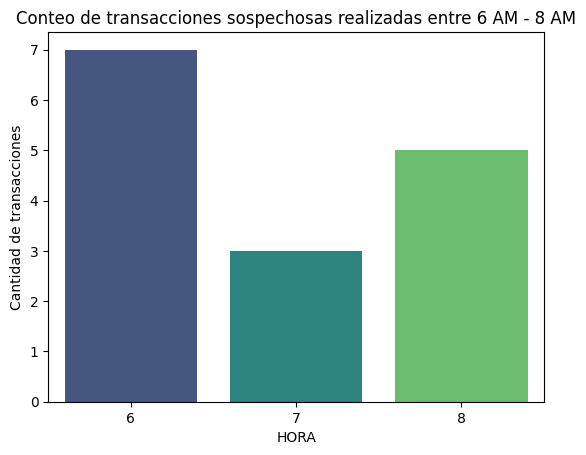

In [7]:

sns.countplot(x='hour', data=high_value_transactions, palette='viridis')
plt.title('Conteo de transacciones sospechosas realizadas entre 6 AM - 8 AM')
plt.xlabel('HORA')
plt.ylabel('Cantidad de transacciones')
plt.show()

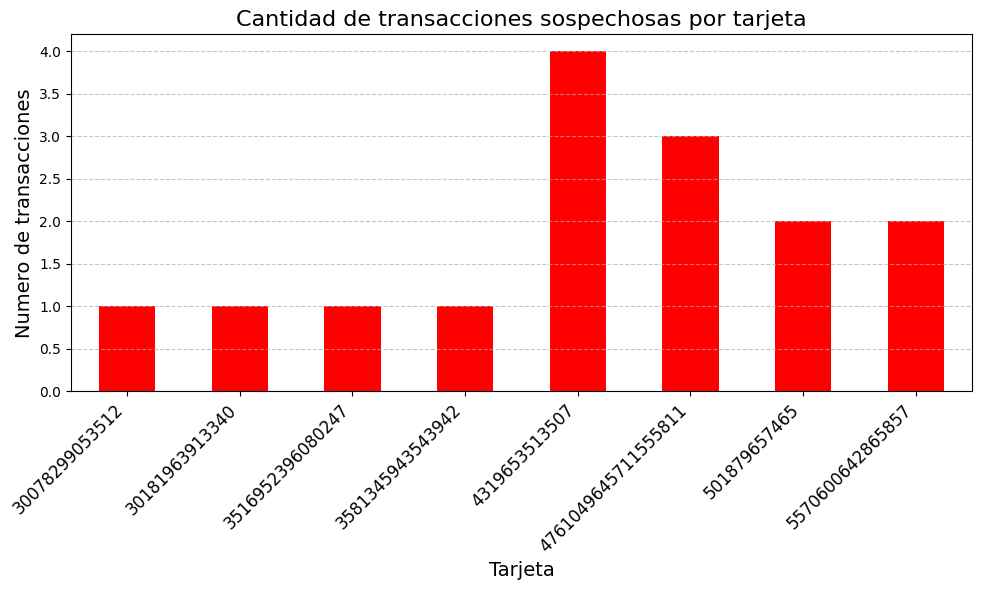

In [8]:

transaction_counts = high_value_transactions.groupby('card').size()


plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar', color='red')


plt.title('Cantidad de transacciones sospechosas por tarjeta', fontsize=16)
plt.xlabel('Tarjeta', fontsize=14)
plt.ylabel('Numero de transacciones', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

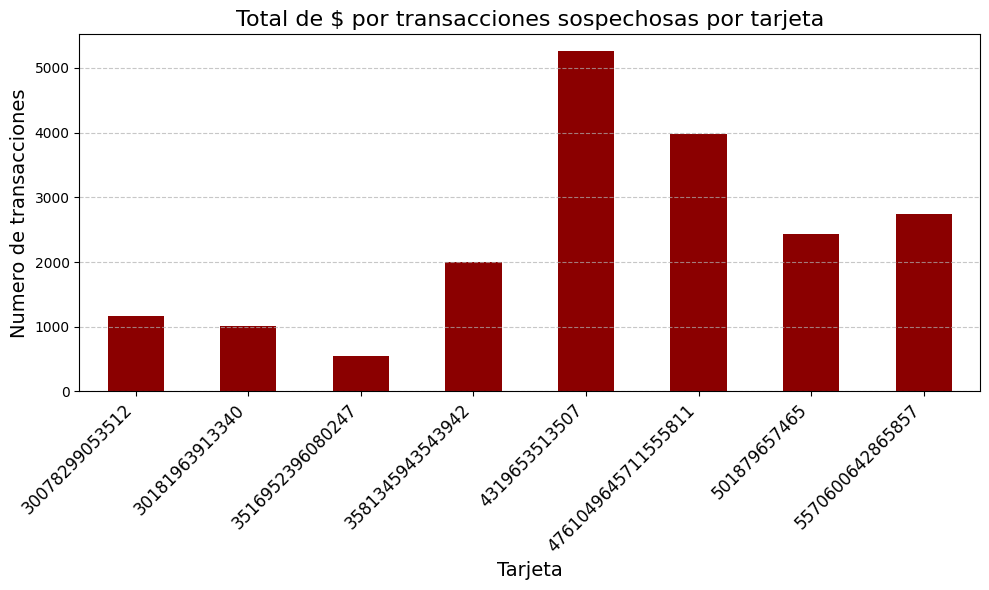

In [11]:
# Group the data by 'card' and count transactions
transaction_counts  = high_value_transactions.groupby('card')['amount'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar', color='darkred')

# Add labels and title
plt.title('Total de $ por transacciones sospechosas por tarjeta', fontsize=16)
plt.xlabel('Tarjeta', fontsize=14)
plt.ylabel('Numero de transacciones', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
# inner join entre transacciones y negocios
#merchants.rename(columns={'id': 'id_merchant'}, inplace=True)
# Assuming the corresponding column in 'merchants' is named 'id'
#ransactions_with_cards = pd.merge(high_value_transactions, merchants, left_on='id_merchant', right_on='id', how='inner')
print(high_value_transactions.head(100))
print(merchants.head(100))
#print(transactions_with_cards.head(100))

        id                date  amount                 card  id_merchant  hour
212   1442 2018-01-22 08:07:03  1131.0     5570600642865857          144     8
219   2667 2018-01-23 06:29:37  1678.0         501879657465           92     6
625   2451 2018-03-05 08:26:08  1617.0     5570600642865857            4     8
636   2840 2018-03-06 07:18:09  1334.0        4319653513507           87     7
852   1620 2018-03-26 07:41:59  1009.0       30181963913340          111     7
960   1341 2018-04-08 06:03:50  1063.0        4319653513507           16     6
991    408 2018-04-10 06:08:01   543.0     3516952396080247           63     6
1306  1377 2018-05-13 06:31:20  1046.0        4319653513507           48     6
1684  2582 2018-06-22 06:16:50  1813.0        4319653513507           40     6
1913  1349 2018-07-14 06:09:18  1160.0       30078299053512          136     6
2360  3125 2018-09-02 06:17:00  2001.0     3581345943543942           18     6
2387  1368 2018-09-06 08:28:55  1017.0  476104964571

### INTENTO FALLIDO DE INNER JOIN

In [32]:
## creamos una nueva columna en ambos dataframes, en esta tomamos los primeros
## 5 digitos de las tarjetas para compararlas entre ellas
high_value_transactions['card_prefix'] = high_value_transactions['card'].astype(str).str[:4]
credit_cards['card_prefix'] = credit_cards['card'].astype(str).str[:4]

# inner join entre transacciones y tarjetas
transactions_with_cards = pd.merge(high_value_transactions, credit_cards, on='card_prefix', how='inner')

card_holders.rename(columns={'id': 'id_card_holder'}, inplace=True)
# inner join entre transacciones con tarjeta y card holders
transactions_with_holders = pd.merge(transactions_with_cards, card_holders, on='id_card_holder', how='inner')

# Display the final dataset
print(transactions_with_holders.head(100))
print(transactions_with_holders.groupby('name').size())


      id                date  amount               card_x  id_merchant  hour  \
0   1442 2018-01-22 08:07:03  1131.0     5570600642865857          144     8   
1   2667 2018-01-23 06:29:37  1678.0         501879657465           92     6   
2   2667 2018-01-23 06:29:37  1678.0         501879657465           92     6   
3   2451 2018-03-05 08:26:08  1617.0     5570600642865857            4     8   
4   2840 2018-03-06 07:18:09  1334.0        4319653513507           87     7   
5   1620 2018-03-26 07:41:59  1009.0       30181963913340          111     7   
6   1341 2018-04-08 06:03:50  1063.0        4319653513507           16     6   
7    408 2018-04-10 06:08:01   543.0     3516952396080247           63     6   
8   1377 2018-05-13 06:31:20  1046.0        4319653513507           48     6   
9   2582 2018-06-22 06:16:50  1813.0        4319653513507           40     6   
10  1349 2018-07-14 06:09:18  1160.0       30078299053512          136     6   
11  3125 2018-09-02 06:17:00  2001.0    

<ipython-input-32-5d5af9bd0be1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_transactions['card_prefix'] = high_value_transactions['card'].astype(str).str[:4]


## 3. Transacciones sospechosas menores o igual a $2

In [17]:
low_value_transactions = transactions[transactions['amount'] <= 2]

<ipython-input-20-65b22a28685e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_value_transactions['day_of_week'] = pd.to_datetime(low_value_transactions['date']).dt.day_name()


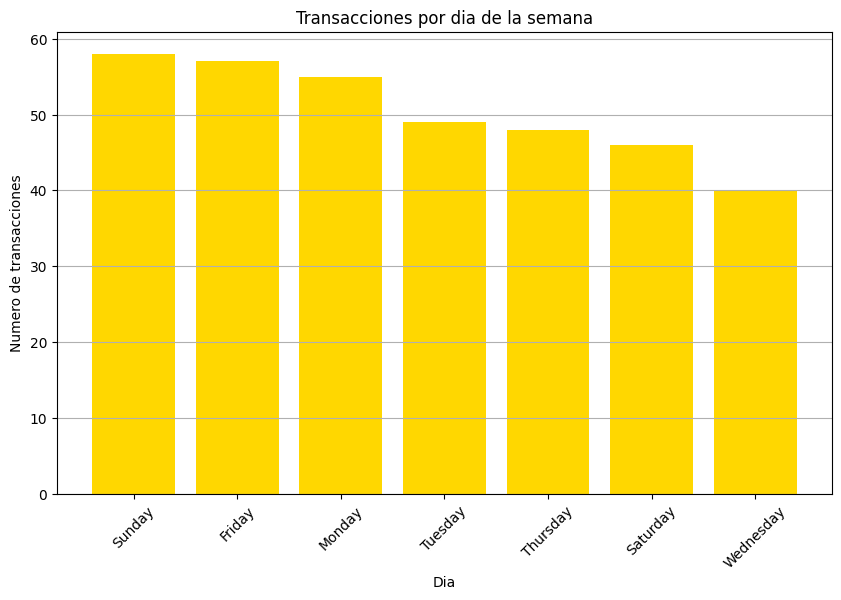

In [20]:
low_value_transactions['day_of_week'] = pd.to_datetime(low_value_transactions['date']).dt.day_name()
day_counts = low_value_transactions['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='gold')
plt.title('Transacciones por dia de la semana')
plt.xlabel('Dia')
plt.ylabel('Numero de transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

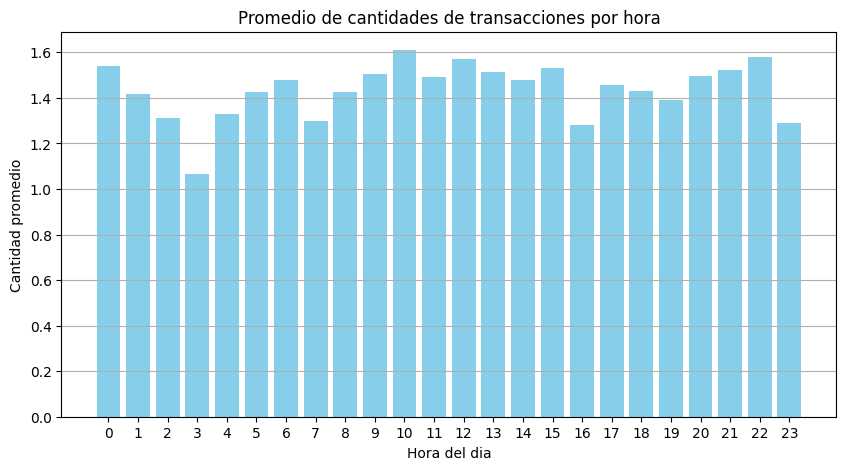

In [16]:
hourly_avg = low_value_transactions.groupby('hour')['amount'].mean()

plt.figure(figsize=(10, 5))
plt.bar(hourly_avg.index, hourly_avg.values, color='skyblue')
plt.title('Promedio de cantidades de transacciones por hora')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad promedio')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

<ipython-input-14-f0996a835aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_value_transactions['date_only'] = pd.to_datetime(low_value_transactions['date']).dt.date


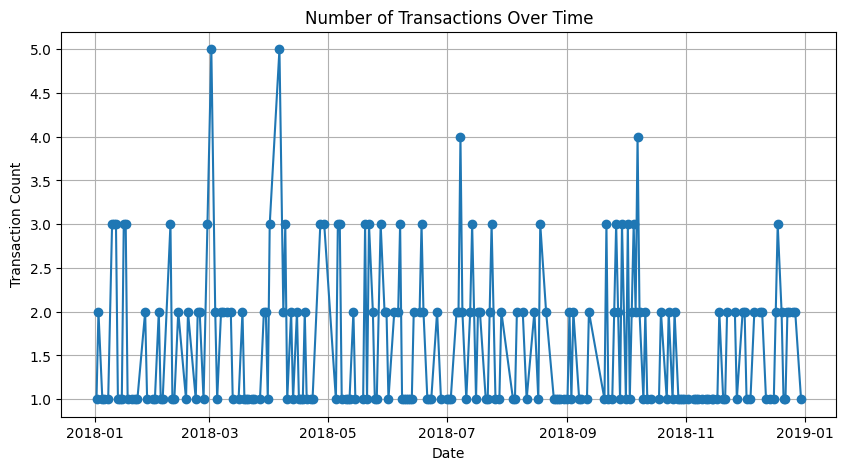

In [14]:
# Example DataFrame setup
low_value_transactions['date_only'] = pd.to_datetime(low_value_transactions['date']).dt.date
daily_counts = low_value_transactions.groupby('date_only').size()

plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid()
plt.show()

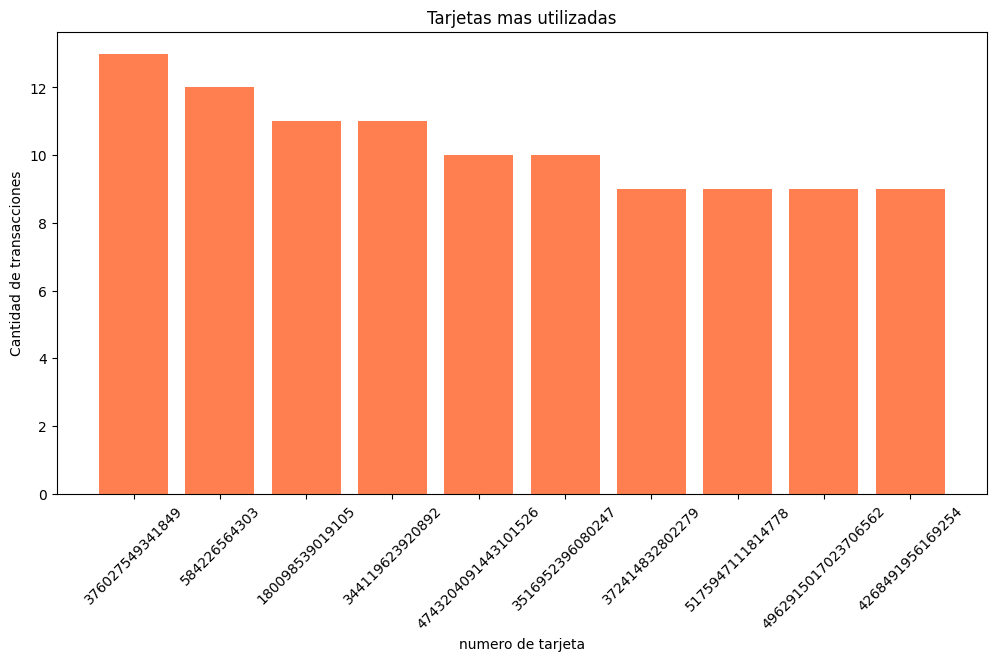

In [30]:
card_usage = low_value_transactions['card'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(card_usage.index[:10], card_usage.values[:10], color='coral')
plt.title('Tarjetas mas utilizadas')
plt.xlabel('numero de tarjeta')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=45)
plt.show()